In [13]:
import pandas as pd

VIX = pd.read_csv('/Users/huangzongyu/Desktop/bloomberg/VIX(daily).csv')
VIX['Date'] = pd.to_datetime(VIX['Date'])
print(VIX.head())

        Date       Open       High        Low      Close  Adj Close  Volume
0 2023-08-21  18.030001  18.110001  16.879999  17.129999  17.129999     0.0
1 2023-08-22  16.959999  17.580000  16.610001  16.969999  16.969999     0.0
2 2023-08-23  16.639999  17.100000  15.910000  15.980000  15.980000     0.0
3 2023-08-24  15.570000  17.320000  15.480000  17.200001  17.200001     0.0
4 2023-08-25  17.209999  17.360001  15.450000  15.680000  15.680000     0.0


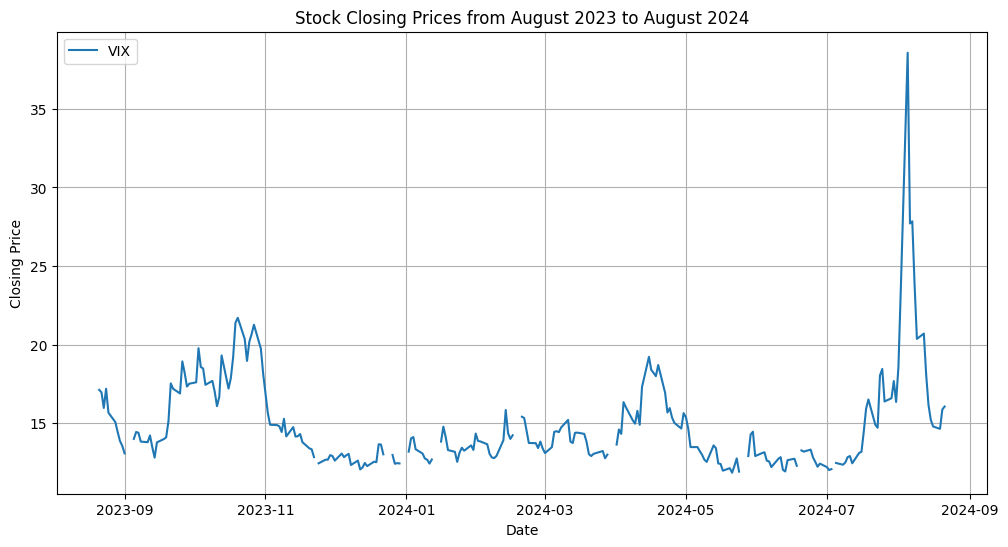

In [14]:
import matplotlib.pyplot as plt


# date range
start_date = '2023-08-01'
end_date = '2024-08-31'

VIX_filtered = VIX[(VIX['Date'] >= start_date) & (VIX['Date'] <= end_date)]

# static line chart
plt.figure(figsize=(12, 6))

plt.plot(VIX_filtered['Date'], VIX_filtered['Close'], label='VIX')


plt.title('Stock Closing Prices from August 2023 to August 2024')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

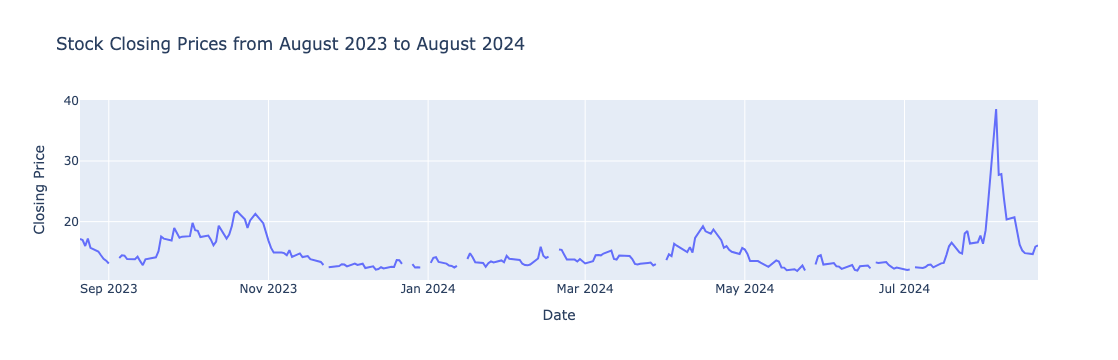

In [22]:
import plotly.graph_objs as go

# time range
start_date = '2023-08-21'
end_date = '2024-08-21'

VIX_filtered = VIX[(VIX['Date'] >= start_date) & (VIX['Date'] <= end_date)]


# Create a line chart using Plotly
fig = go.Figure()

# Add traces for each stock
fig.add_trace(go.Scatter(x=VIX_filtered['Date'], y=VIX_filtered['Close'], mode='lines', name='VIX'))

# Update layout
fig.update_layout(
    title='Stock Closing Prices from August 2023 to August 2024',
    xaxis_title='Date',
    yaxis_title='Closing Price',
    hovermode='x unified'
)

# Show the plot
fig.show()

In [16]:
top_3_date = VIX_filtered.nlargest(3, 'Close')

print("Top 3 VIX values and corresponding dates:")
print(top_3_date[['Date', 'Close']])

Top 3 VIX values and corresponding dates:
          Date      Close
250 2024-08-05  38.570000
252 2024-08-07  27.850000
251 2024-08-06  27.709999


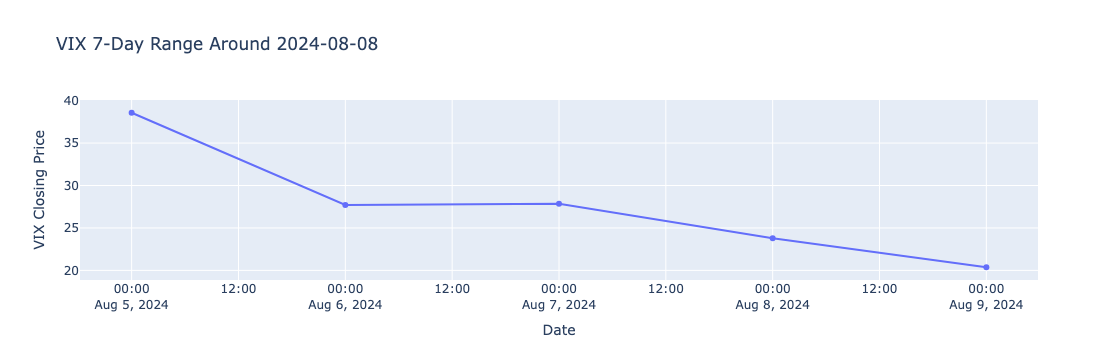

In [24]:
import plotly.graph_objs as go

# Visualization based on the data collected
if len(seven_day_ranges['Date'].unique()) <= 7:
    # If there's only one 7-day range (7 unique dates)
    fig = go.Figure()
    
    fig.add_trace(go.Scatter(
        x=seven_day_ranges['Date'], 
        y=seven_day_ranges['Close'], 
        mode='lines+markers', 
        name='VIX - 7-Day Range',
        hovertemplate='Date: %{x}<br>VIX Closing Price: %{y}<extra></extra>'
    ))

    fig.update_layout(
        title=f'VIX 7-Day Range Around {seven_day_ranges["Date"].iloc[3].date()}',
        xaxis_title='Date',
        yaxis_title='VIX Closing Price',
        hovermode='x unified'
    )

    fig.show()

else:
    # If there are three separate 7-day ranges
    unique_dates = top_3_date['Date'].sort_values().reset_index(drop=True)
    fig = go.Figure()

    for date in unique_dates:
        window_start = date - pd.Timedelta(days=3)
        window_end = date + pd.Timedelta(days=3)
        window_data = VIX_filtered[(VIX_filtered['Date'] >= window_start) & (VIX_filtered['Date'] <= window_end)]
        
        fig.add_trace(go.Scatter(
            x=window_data['Date'], 
            y=window_data['Close'], 
            mode='lines+markers', 
            name=f'VIX - 7-Day Range Around {date.date()}',
            hovertemplate='Date: %{x}<br>VIX Closing Price: %{y}<extra></extra>'
        ))

    fig.update_layout(
        title='VIX 7-Day Ranges Around Top Dates',
        xaxis_title='Date',
        yaxis_title='VIX Closing Price',
        hovermode='x unified'
    )

    fig.show()

